In [474]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import metrics

In [475]:
# id:5--10-5 
df = pd.read_csv("./data/week2.csv")
X1 = df.iloc[:, 0]
X2 = df.iloc[:, 1]
Y = df.iloc[:, 2]
X = np.column_stack((X1,X2))
y = np.array(Y)
df.dropna(inplace = True)

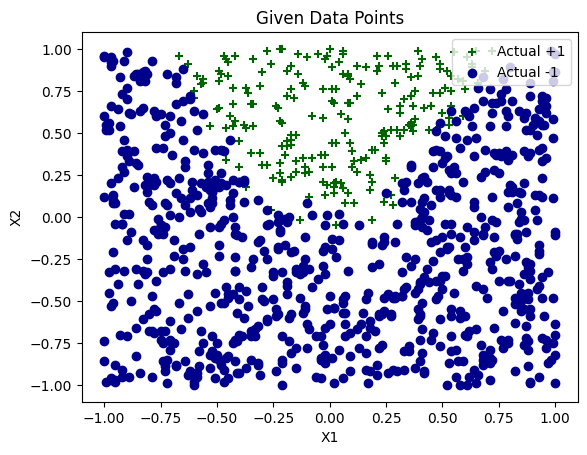

In [476]:
postive = [i for i in range(len(y)) if y[i] == 1]
plt.scatter([X[i][0] for i in postive], [X[i][1] for i in postive], marker='+', color='darkgreen', label='Actual +1')

negative = [i for i in range(len(y)) if y[i] == -1]
plt.scatter([X[i][0] for i in negative], [X[i][1] for i in negative], marker='o', color='darkblue', label='Actual -1')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Given Data Points')
plt.show()

In [477]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
classes_ = log_reg.classes_
coef = log_reg.coef_[0]
intercept = log_reg.intercept_[0] 
features_in = log_reg.n_features_in_

print(f"Total Features in model: {log_reg.n_features_in_}")
print(f"classes: {classes_}")
print(f"Intercept: {round(intercept,3)}")
print(f"Coefficient for Feature X1: {round(coef[0],3)}")
print(f"Coefficient for Feature X2: {round(coef[1],3)}")

Total Features in model: 2
classes: [-1  1]
Intercept: -2.25
Coefficient for Feature X1: 0.178
Coefficient for Feature X2: 3.653


In [478]:
data = {
    'X1' : X1,
    'X2' : X2,
    'Y' : Y
}
dataFrame = pd.DataFrame(data)
corr_X1_Y = dataFrame['X1'].corr(dataFrame['Y'])
corr_X2_Y = dataFrame['X2'].corr(dataFrame['Y'])
print(f"Correlation between X1 and Y: {round(corr_X1_Y,3)}")
print(f"Correlation between X2 and Y: {round(corr_X2_Y,3)}")
variance_X1 = np.var(X1, ddof=1)
variance_X2 = np.var(X2, ddof=1)
print(f'Variance of X1: {round(variance_X1,3)}')
print(f'Variance of X2: {round(variance_X2,3)}')

Correlation between X1 and Y: 0.014
Correlation between X2 and Y: 0.571
Variance of X1: 0.343
Variance of X2: 0.337


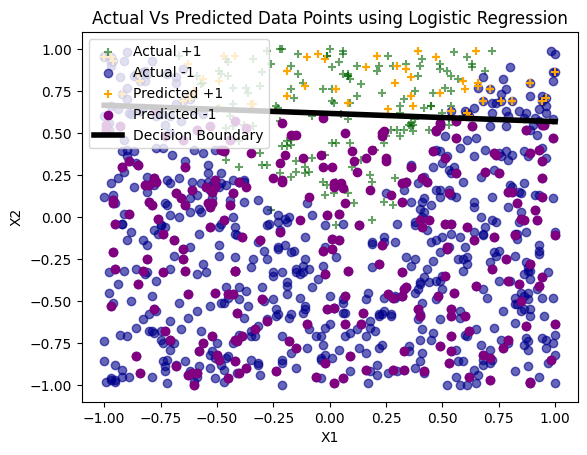

In [479]:
y_pred = log_reg.predict(X_test)

positive = [i for i in range(len(y)) if y[i] == 1]
plt.scatter([X[i][0] for i in positive], [X[i][1] for i in positive], marker='+', color='darkgreen', label='Actual +1', alpha=0.6)

negative = [i for i in range(len(y)) if y[i] == -1]
plt.scatter([X[i][0] for i in negative], [X[i][1] for i in negative], marker='o', color='darkblue', label='Actual -1', alpha=0.6)

positive_pred = [i for i in range(len(y_pred)) if y_pred[i] == 1]
plt.scatter([X_test[i][0] for i in positive_pred], [X_test[i][1] for i in positive_pred], marker='+', color='orange', label='Predicted +1', alpha=1)

negative_pred = [i for i in range(len(y_pred)) if y_pred[i] == -1]
plt.scatter([X_test[i][0] for i in negative_pred], [X_test[i][1] for i in negative_pred], marker='o', color='purple', label='Predicted -1', alpha=1)


min_X1 = min(X1)
max_X1 = max(X1)

num_points = 50
step_size = (max_X1 - min_X1) / (num_points - 1)

x1_vals = [min_X1 + i * step_size for i in range(num_points)]
x2_vals = [ -((coef[0] * x) / coef[1]) - (intercept / coef[1]) for x in x1_vals]

plt.plot(x1_vals, x2_vals, color='black', label='Decision Boundary', linewidth=4)

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Actual Vs Predicted Data Points using Logistic Regression')
plt.show()


# 2

 
Intercept for C=0.001 : -0.328
Coefficient of X1 for C=0.001 : 0.005
Coefficient of X2 for C=0.001 : 0.27
 
Intercept for C=0.01 : -0.542
Coefficient of X1 for C=0.01 : 0.033
Coefficient of X2 for C=0.01 : 0.738
 
Intercept for C=1.0 : -0.805
Coefficient of X1 for C=1.0 : 0.077
Coefficient of X2 for C=1.0 : 1.362
 
Intercept for C=42.78 : -0.814
Coefficient of X1 for C=42.78 : 0.078
Coefficient of X2 for C=42.78 : 1.381
 
Intercept for C=55.776 : -0.814
Coefficient of X1 for C=55.776 : 0.078
Coefficient of X2 for C=55.776 : 1.381
 
Intercept for C=57.21 : -0.814
Coefficient of X1 for C=57.21 : 0.078
Coefficient of X2 for C=57.21 : 1.381
 
Intercept for C=82.337 : -0.814
Coefficient of X1 for C=82.337 : 0.078
Coefficient of X2 for C=82.337 : 1.382
 
Intercept for C=87.867 : -0.814
Coefficient of X1 for C=87.867 : 0.078
Coefficient of X2 for C=87.867 : 1.382
 
Intercept for C=98.948 : -0.814
Coefficient of X1 for C=98.948 : 0.078
Coefficient of X2 for C=98.948 : 1.382


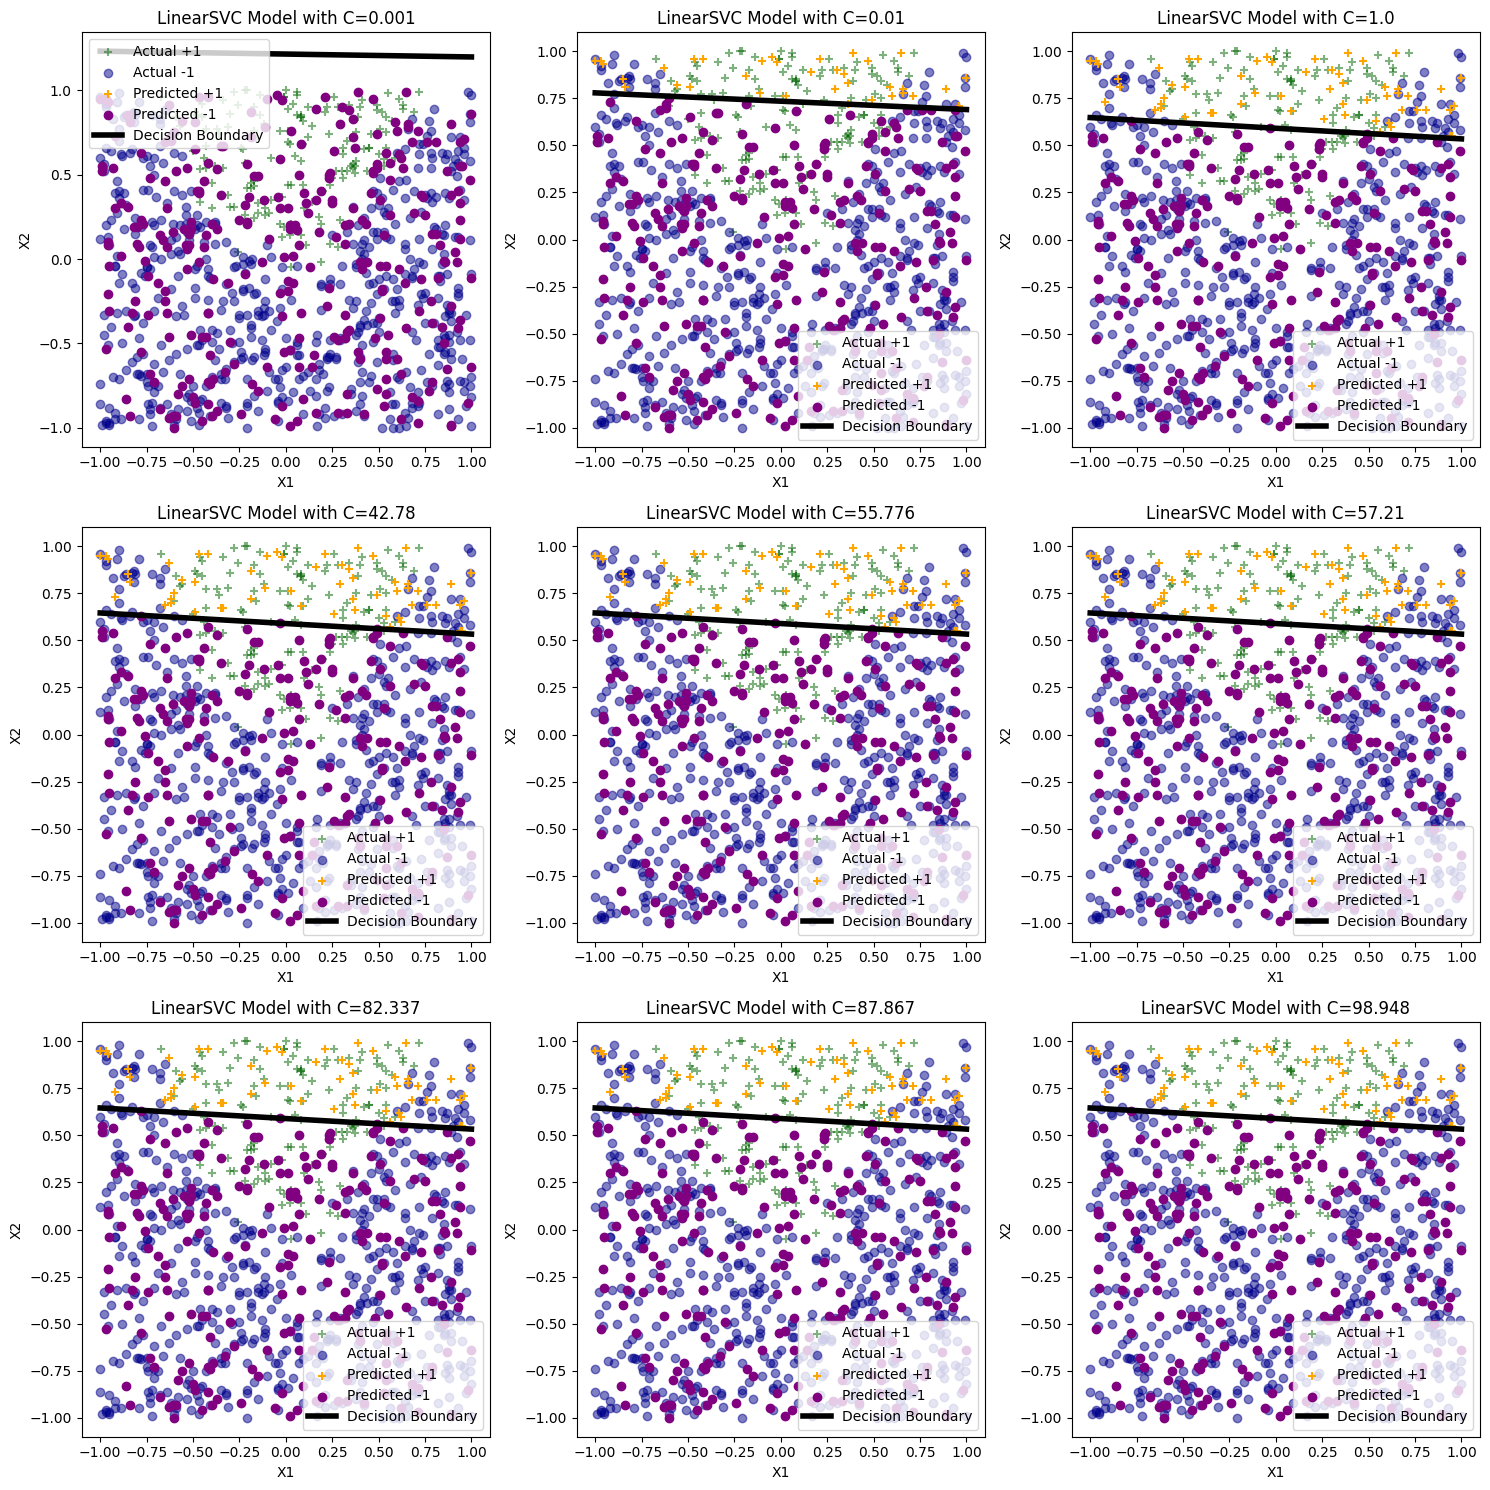

In [480]:
C = [8.2337e+01, 5.5776e+01, 8.7867e+01, 4.2780e+01, 5.7210e+01, 9.8948e+01, 1.0000e-03 , 1.0000e-02, 1.0000e+00]
C.sort()
n_cols = 3
n_rows = (len(C) + n_cols - 1) // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axs = axs.flatten()


for i in range(len(C)):
    
    Linear_svc = LinearSVC(C = C[i])
    Linear_svc.fit(X_train, y_train)
    coef = Linear_svc.coef_[0]
    intercept = Linear_svc.intercept_[0]
    print(" ")
    print(f"Intercept for C={C[i]} : {round(intercept,3)}")
    print(f"Coefficient of X1 for C={C[i]} : {round(coef[0],3)}")
    print(f"Coefficient of X2 for C={C[i]} : {round(coef[1],3)}")

    y_pred = Linear_svc.predict(X_test)
    positive = [i for i in range(len(y_train)) if y_train[i] == 1]
    negative = [i for i in range(len(y_train)) if y_train[i] == -1]
    axs[i].scatter([X_train[i][0] for i in positive], [X_train[i][1] for i in positive], 
                     marker='+', color='darkgreen', label='Actual +1',alpha=0.5)
    axs[i].scatter([X_train[i][0] for i in negative], [X_train[i][1] for i in negative], 
                     marker='o', color='darkblue', label='Actual -1',alpha=0.5)

    positive_pred = [i for i in range(len(y_pred)) if y_pred[i] == 1]
    negative_pred = [i for i in range(len(y_pred)) if y_pred[i] == -1]
    axs[i].scatter([X_test[i][0] for i in positive_pred], [X_test[i][1] for i in positive_pred], 
                     marker='+', color='orange', label='Predicted +1',alpha=1)
    axs[i].scatter([X_test[i][0] for i in negative_pred], [X_test[i][1] for i in negative_pred], 
                     marker='o', color='purple', label='Predicted -1',alpha=1)


    min_X1 = min(X1)
    max_X1 = max(X1)

    num_points = 50
    step_size = (max_X1 - min_X1) / (num_points - 1)

    x1_vals = [min_X1 + i * step_size for i in range(num_points)]
    x2_vals = [ -((coef[0] * x) / coef[1]) - (intercept / coef[1]) for x in x1_vals]

    axs[i].plot(x1_vals, x2_vals, color='black', label='Decision Boundary',linewidth=4)
    
    axs[i].set_title(f"LinearSVC Model with C={C[i]}")
    axs[i].set_xlabel('X1')
    axs[i].set_ylabel('X2')
    axs[i].legend()

plt.tight_layout()
plt.show()

# 3

In [481]:
X3 = (X1 ** 2).astype(str).to_numpy()
X4 = (X2 ** 2).astype(str).to_numpy()
X = np.column_stack((X1,X2,X3,X4))

In [482]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
coef = log_reg.coef_[0]
intercept = log_reg.intercept_[0] 

print(f"Intercept: {round(intercept,3)}")
print(f"Coefficient for Feature X1: {round(coef[0],3)}")
print(f"Coefficient for Feature X2: {round(coef[1],3)}")
print(f"Coefficient for Feature X3: {round(coef[2],3)}")
print(f"Coefficient for Feature X4: {round(coef[3],3)}")

Intercept: -0.861
Coefficient for Feature X1: 0.25
Coefficient for Feature X2: 4.868
Coefficient for Feature X3: -6.878
Coefficient for Feature X4: 0.369


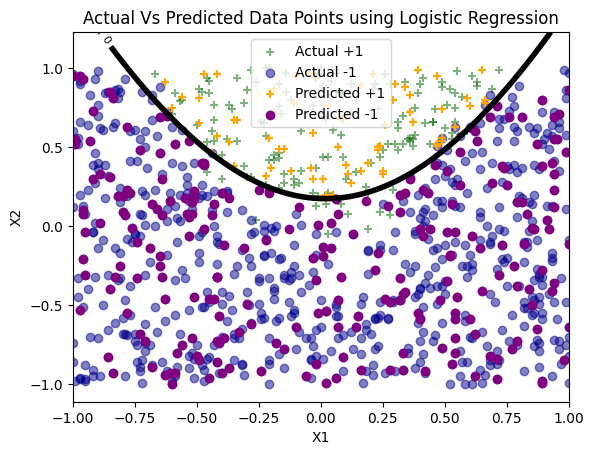

In [483]:
y_pred = log_reg.predict(X_test)

postive = [i for i in range(len(y)) if y[i] == 1]
plt.scatter([X[i][0] for i in postive], [X[i][1] for i in postive], marker='+', color='darkgreen', label='Actual +1',alpha=0.5)

negative = [i for i in range(len(y)) if y[i] == -1]
plt.scatter([X[i][0] for i in negative], [X[i][1] for i in negative], marker='o', color='darkblue', label='Actual -1',alpha=0.5)

positive_pred = [i for i in range(len(y_pred)) if y_pred[i] == 1]
plt.scatter([X_test[i][0] for i in positive_pred], [X_test[i][1] for i in positive_pred], marker='+', color='orange', label='Predicted +1', alpha=1)

negative_pred = [i for i in range(len(y_pred)) if y_pred[i] == -1]
plt.scatter([X_test[i][0] for i in negative_pred], [X_test[i][1] for i in negative_pred], marker='o', color='purple', label='Predicted -1', alpha=1)


min_X1, max_X1 = np.min(X1), np.max(X1)
min_X2, max_X2 = np.min(X2), np.max(X2)

num_points = 500
step_size = (max_X1 - min_X1) / (num_points - 1)

x1_vals = [min_X1 + i * step_size for i in range(num_points)]
x2_vals = [ -((coef[0] * x) / coef[1]) - (intercept / coef[1]) for x in x1_vals]

extended_min_X2 = min(x2_vals) - 1
extended_max_X2 = max(x2_vals) + 1

X1_grid, X2_grid = np.meshgrid(x1_vals, np.linspace(extended_min_X2, extended_max_X2, num_points))

X3_grid = X1_grid ** 2
X4_grid = X2_grid ** 2

Z = intercept + coef[0] * X1_grid + coef[1] * X2_grid + coef[2] * X3_grid + coef[3] * X4_grid
contours = plt.contour(X1_grid, X2_grid, Z, levels=[0], colors='black', linewidths=4)
plt.clabel(contours, inline=True, fontsize=8)

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Actual Vs Predicted Data Points using Logistic Regression')
plt.show()

In [484]:
classifier_prediction = log_reg.predict(X_train)
classifier_accuracy = metrics.accuracy_score(y_train,classifier_prediction)

y_test_unique, y_test_frequency = np.unique(y_test, return_counts=True)
max_frequency_index = np.argmax(y_test_frequency)
y_pred_baseline = np.full((len(y), 1), y_test_unique[max_frequency_index])
baseline_accuracy = metrics.accuracy_score(y,y_pred_baseline)

print(f"Baseline Accuracy: {round(baseline_accuracy,3)}")
print(f"Classifier Accuracy: {round(classifier_accuracy,3)}")

Baseline Accuracy: 0.775
Classifier Accuracy: 0.97
